# Lab 3

### Keira Hansen and Alex Foster

## Problem 1

### __(A)__

In [7]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import special

In [30]:
def make_cut(dist, sigma):
    print('%1.3f\u03C3' % sigma)
    
    upper = np.abs(stats.norm.ppf(stats.norm.cdf(sigma), loc=12, scale=0.4))
    lower = np.abs(stats.norm.ppf(1 - stats.norm.cdf(sigma), loc=12, scale=0.4))

    print("Lower bound: " + str(lower))
    print("Upper bound: " + str(upper))
    
    sorted_dist = dist.sort(axis=0)
    i = 0
    cut_dist = []
    while dist[i] < lower:
        i += 1

    while i < size and dist[i] <= upper:
        cut_dist.append(dist[i])
        i += 1
    
    print("Original length of data = " + str(len(dist)))
    print("Size of kept data = " + str(len(cut_dist)))
    print()

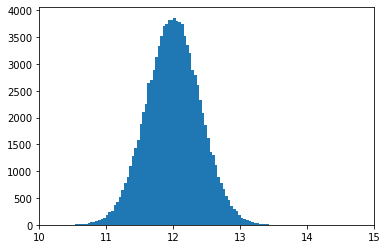

8/100008 = 3.7750318807261567σ

4.000σ
Lower bound: 10.4
Upper bound: 13.6
Original length of data = 100000
Size of kept data = 99994



In [57]:
good_data = stats.norm.rvs(loc=12, scale=0.4, size=100000)
bad_data = [10.0, 10.3, 2.1, 0.0, 0.0, 15.6, 22.3, 12.7]

plt.hist(good_data, 100)
plt.xlim(10, 15)
plt.show()

sig = np.abs(stats.norm.ppf(8/100008))
print('8/100008 = ' + str(sig) + '\u03C3')
print()
make_cut(data, 4)

We have the hindsight of knowing that our good data set had 100000 data points were our bad data set only has 8 data points, so we have a total data set of 100008 data points were 8 are bad, so the probability of a data point being a bad data point is 8/100008 which equates to 3.775$\sigma$. So I am going to excluse the data points on the distribution of background data that is equally or more likely to be a bad data point.

I ended up using 4$\sigma$ because first, it was a nicer number makes it easier to compare to 3$\sigma$ and 5$\sigma$ later on. But also because in a real life situation we would not know how many of our data points were bad and so we could not choose a sigma as accurate as 3.775, and 4$\sigma$ is right inbetween 3$\sigma$, where the majority of our data will reside, and 5$\sigma$ which is considered to be a measurement of significant.

| 4$\sigma$ | True | False |
| :---:|:---:|:---: |
| __pos__ | 0.99994 | 0.125 |
| __neg__ | 0.00006 | 0.875 |

### __(B)__

In [40]:
data = stats.norm.rvs(loc=12, scale=0.4, size=100000)
make_cut(data, 3)
data = stats.norm.rvs(loc=12, scale=0.4, size=100000)
make_cut(data, 5)

3.000σ
Lower bound: 10.8
Upper bound: 13.2
Original length of data = 100000
Size of kept data = 99719

5.000σ
Lower bound: 10.00000000001193
Upper bound: 13.99999999998807
Original length of data = 100000
Size of kept data = 100000



| 3$\sigma$ | True | False |
|:---:|:---:|:---:|
|__pos__ | 0.9973 | 0.125 |
|__neg__ | 0.0027 | 0.875 |


| 5$\sigma$ | True | False |
|:---:|:---:|:---: |
| __pos__ | 1.00 | 0.25 |
| __neg__ | 0.00 | 0.75 |


I reran the code that I used with our initial threshhold, which was 4$\sigma$, with 1$\sigma$ above and below to see how the number of data points kept and thrown out changed. 

The gerater the treshhold you have the less likely you are to throw away good data. This is because you are allowing data point up untill this threshhold which is further and further out on the tails of the distribution the higher your threshhold. At 5$\sigma$ the number of good data points being thrown away are almost none, at least with only 100000 data points but at 3$\sigma$ you can see than we cut on average 270 good data points out of 100000. 

### __(C)__

When you increase your threshhold the further out on the tails of the distribution you go, so the broader range of values you are including in your data, this means that you may end up keeping more of the bad data points.

In a real life situation you would most likely not be able to completely avoid including bad data points in you data set. You could only cut points you knew were caused by another effect. For example in my research we are often only interested in the beta peaks of a decay spectrum from a radioactive source but we get "bad" data from alpha peaks that are a result of background and cosmic radiation, the alpha peaks can wash out the beta peaks since they are so broad. However the waveforms that correspond to alpha particles are slightly different than the waveforms from beta particles, they will have longer tails. So we can take two different waveform filters and get different values. This allows us to cut our "bad" data with a fair amount of certainty.

## Problem 2

In [49]:
print('5\u03C3 = ' + str(1 - stats.norm.cdf(5)))

5σ = 2.866515719235352e-07


What is the distance our potential astroid must move to distinguish itself by at least 5$\sigma$ from the background?

5$\sigma$ corresponds to a probability for a normal gaussian distribution of 2.866515719235352e-07, which is an integral of the probability distribution function from some value, $d$, out to $\infty$. If we want to know what distance corresponds to 5$\sigma$ what we will want to look for is the bound $d$. Since we have a 2D distribution in terms of $\Delta x$ and $\Delta y$, the lower bound, $d$, would be equal to $\sqrt{\Delta x^2 + \Delta y^2}$. I am going to use the variable $r$ to designate the distance from the origin. Seeing as our distribution follows cylindrical symmetry we can change our coordinates to $r$ and $\theta$ where we integrate with respect to $\theta$ from 0 to $2\pi$.

Since we know our background follows a normal distribution we have $\mu = 0$ and $\sigma = 1$ so our distribution is represented by $\displaystyle \frac{1}{2\pi}e^{-\frac{r^2}{2}}$.

Our integral we will solve for $d$ for is then $\displaystyle 2.8665\times 10^{-7} = \int_{0}^{2\pi}\int_{d}^{\infty}r\,\frac{1}{2\pi}e^{-\frac{r^2}{2}}\,d\theta\,dr$. This is set equal to the the probability corresponding to 4$\sigma$ since that is what the question is asking us to do.

Solving for $d$ we get:

$\displaystyle 2.8665\times 10^{-7} = \int_{d}^{\infty}r\,e^{-\frac{r^2}{2}}\,dr$

$\displaystyle 2.8665\times 10^{-7} = e^{\frac{-d^2}{2}}$

$\displaystyle d = \sqrt{-2\,\ln(2.8665\times 10^{-7})}$

$d = 5.489080775$ arcseconds

$\sqrt{\Delta x^2 + \Delta y^2}$ must be 5.489080775 arcseconds or greater to have a significance of at least 5$\sigma$.

## Problem 3

What is the probability of our measurement of 6800 cosmic rays over 7200 minutes not being caused by our expected background measurement for 7200 minutes?

Since we have an average number of events per minute we can use the poisson distribution to represet our background.
The total observation time is 8 hours per night for 15 days or 7200 minutes. The average background rate is 1 cosmic ray per minute so for an interval of 7200 minutes we would expect 7200 cosmic rays. In that time we saw 6800 cosmic rays.

The PMF of a poisson distribution is $\displaystyle \frac{\mu^k}{k!}e^{-\mu}$ where k is the number of events in a given interval and $\mu$ is the average number of events expected in the given interval. So for our situation we would have $\mu = 7200$. We want to integrate from 6800 out to $\infty$ to get the probability that our measurement is not what we would expect from our background and therefore is a moon shadow detection.

probability = $\displaystyle \int_{6800}^{\infty} \frac{7200^k}{k!}e^{-7200}\, dk$

In [63]:
prob = 1 - np.abs(stats.poisson.cdf(6800, mu=7200))
sigma = stats.norm.ppf(prob)
print('%1.3f\u03C3' % sigma)

4.751σ


Our measurement has a significance of 4.751$\sigma$.